In [82]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
%matplotlib inline

In [84]:
DIR = './aerial-cactus-identification/train/train'

In [85]:
df = pd.read_csv('./aerial-cactus-identification/train.csv')

In [86]:
df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [87]:
int(df.loc[df['id'] == '000c8a36845c0208e833c79c1bffedd1.jpg']['has_cactus'])

1

In [88]:
def label_img(name):
    return int(df.loc[df['id'] == '000c8a36845c0208e833c79c1bffedd1.jpg']['has_cactus'])

In [89]:
IMG_SIZE = 300

In [90]:
def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            
    shuffle(train_data)
    return train_data

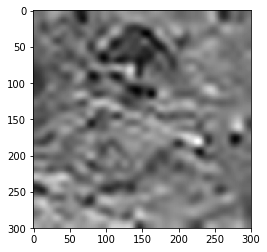

In [91]:
train_data = load_training_data()
plt.imshow(train_data[43][0], cmap = 'gist_gray')

In [92]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [93]:
trainImages.shape

(17500, 300, 300, 1)

In [94]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization

In [95]:
from keras.layers import Convolution2D

In [96]:
from keras import backend as K
K.set_image_dim_ordering('tf')

In [97]:
trainImages[0][0][0][0]

109

In [98]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [99]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [100]:
trainLabels.shape

(17500,)

In [101]:
from keras.utils import to_categorical

In [102]:
trainLabelsCat = to_categorical(trainLabels)
print(trainLabelsCat)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
model.fit(trainImages, trainLabelsCat, batch_size = 50, epochs = 5, verbose = 1)

Epoch 1/5
 9500/17500 [===============>..............] - ETA: 18:21 - loss: 0.0105 - acc: 0.9955

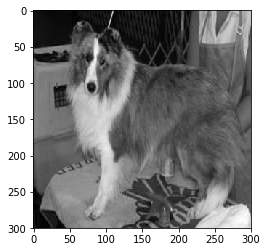

In [34]:
# Test on Test Set
TEST_DIR = './test'
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data


test_data = load_test_data()    
plt.imshow(test_data[10][0], cmap = 'gist_gray')

In [35]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

74.4186052056246
